<a href="https://colab.research.google.com/github/buzzudit/Learning-Deep-Learning/blob/master/ANN_Regression_with_Synthetic_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
!pip install -q tensorflow-gpu -U
import tensorflow as tf

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


In [15]:
#Make the dataset
N  = 1000
X = np.random.random((N,2)) * 6 - 3 #uniform b/w -3 and +3
Y = np.cos(2*X[:,0]) + np.cos(3*X[:,1])

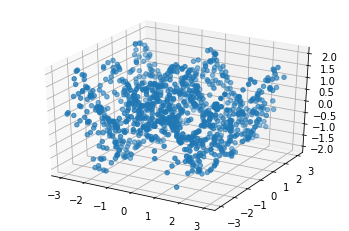

In [17]:
%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)


In [19]:
model = tf.keras.models.Sequential([
                                   tf.keras.layers.Dense(128,input_shape=(2,), activation='relu'),
                                   tf.keras.layers.Dense(1)
                                   
])

In [20]:
opt = tf.keras.optimizers.Adam(0.01)
model.compile(optimizer=opt, loss='mse')
r  =  model.fit(X,Y,epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 3ms/step - loss: 0.9567
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.8975
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8938
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.8490
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8027
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7599
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7039
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6576
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6180
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.5407
Epoch 11/100
32/32 [==============================] - 0s 3ms/step - loss: 0.5109
Epoch 12/100
32/32 [==============================] - 0s 3ms/step - loss: 0.5032
Epoch 13/100
32/32 [=================

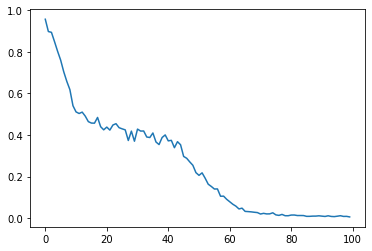

In [21]:
plt.plot(r.history['loss'],label='loss')

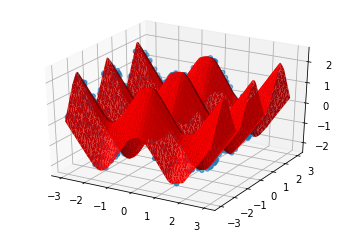

In [27]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)

#surface plot
line = np.linspace(-3, 3, 50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0],Xgrid[:,1],Yhat, linewidth=0.2, antialiased=True,color='red')
